In [258]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Machine_Learning/Customer_Churn"

/content/drive/MyDrive/Machine_Learning/Customer_Churn


# **Data Science Life Cycle**

## **Business Understanding & Problem Definition**

**ปัญหาทางธุรกิจ:** บริษัทโทรคมนาคม (Telco) กำลังเผชิญกับปัญหาลูกค้าที่ยกเลิกบริการ (Churn) ซึ่งส่งผลให้สูญเสียรายได้และค่าใช้จ่ายในการหาลูกค้าใหม่สูง

**เป้าหมายของโปรเจกต์:** สร้างโมเดล Machine Learning ที่สามารถ ทำนาย ว่าลูกค้าคนใดมีแนวโน้มที่จะยกเลิกบริการในอนาคต

**ประโยชน์ที่คาดว่าจะได้รับ:** เมื่อระบุลูกค้ากลุ่มเสี่ยงได้ บริษัทจะสามารถใช้มาตรการเชิงรุก (เช่น เสนอโปรโมชั่นพิเศษ, ให้บริการที่ดีขึ้น) เพื่อรักษาลูกค้ากลุ่มนั้นไว้ได้

**Output ที่ต้องการ:** โมเดลทำนาย (Classification Model) และ Insight ที่ได้จากการวิเคราะห์ว่าปัจจัยใดบ้างที่มีผลต่อการ Churn ของลูกค้า

**Metric ความสำเร็จ (KPI):**
Accuracy: สัดส่วนของลูกค้าที่ทำนายถูกทั้งหมด

*   Precision: สัดส่วนของลูกค้าที่ทำนายว่า Churn แล้ว Churn จริง

*   Recall: สัดส่วนของลูกค้าที่ Churn จริง ที่โมเดลสามารถทำนายได้ถูกต้อง
*   F1-Score: ค่าเฉลี่ยแบบถ่วงน้ำหนักของ Precision และ Recall (มักใช้เมื่อข้อมูลไม่สมดุล)

**คำแนะนำ:** ในปัญหา Churn เรามักจะให้ความสำคัญกับ Recall และ Precision เป็นพิเศษ เพราะการพลาดลูกค้าที่ Churn จริง (False Negative) หรือการทักผิดคน (False Positive) มีผลกระทบทางธุรกิจ

## **Data Understanding & Data Collection**

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported Susscessfully")

Libraries imported Susscessfully


In [261]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [263]:
df.shape

(7043, 21)

In [264]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [265]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [266]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [267]:
# ตรวจสอบค่าที่ไม่ซ้ำกันในบางคอลัมน์ที่เป็น Object (เพื่อดูว่ามีค่าแปลกๆ ไหม)
print("\nUnique values in key object columns:")
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'RouterProtection', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    if col in df.columns:
        print(f"\n{col}: {df[col].unique()}")


Unique values in key object columns:

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']


## **Data Wrangling (Data Preparation/Cleaning)**

In [268]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [269]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
print(f"NaNs in 'TotalCharges' after replacing blanks: {df['TotalCharges'].isnull().sum()}")

NaNs in 'TotalCharges' after replacing blanks: 11


In [270]:
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors= 'coerce')
print(f"NaNs in 'TotalCharges' after converting to numeric: {df['TotalCharges'].isnull().sum()}")

NaNs in 'TotalCharges' after converting to numeric: 11


In [271]:
df['TotalCharges'].dtypes

dtype('float64')

In [272]:
median_totalcharges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_totalcharges, inplace=True)

<ipython-input-272-6c7d0174b640>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_totalcharges, inplace=True)


In [273]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [274]:
print("\n--- Handling 'customerID' ---")
df.drop('customerID', axis=1, inplace=True)
print("Dropped 'customerID' column.")


--- Handling 'customerID' ---
Dropped 'customerID' column.


In [275]:
df.shape

(7043, 20)

In [276]:
print("\n--- Handling Categorical Features ---")
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
multiple_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df['Churn'] =df['Churn'].map({'Yes': 1, 'No': 0})
print('Converted Churn Complete')

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
print('Converted gender Complete')

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
print('Converted binary columns Complete')

for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].replace({'No internet service', 'No'})
print('Replaced No internet service Complete')

for col in multiple_cols:
    df[col] = df[col].replace({'No phone service', 'No'})
print('Replaced No phone service Complete')

df = pd.get_dummies(df, columns=multiple_cols, drop_first=True)
print('One-hot encoded multiple columns Complete')



--- Handling Categorical Features ---
Converted Churn Complete
Converted gender Complete
Converted binary columns Complete
Replaced No internet service Complete
Replaced No phone service Complete
One-hot encoded multiple columns Complete


<ipython-input-276-872aaee5bc63>:17: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df[col] = df[col].replace({'No internet service', 'No'})
<ipython-input-276-872aaee5bc63>:21: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df[col] = df[col].replace({'No phone service', 'No'})


In [277]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

## **Exploratory Data Analysis (EDA) & Data Visualization**

In [279]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 14

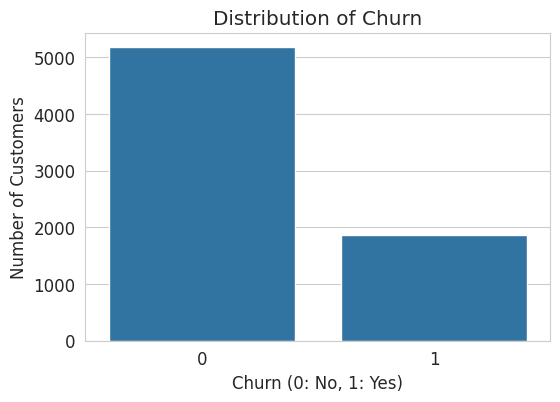

In [280]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.show()

In [281]:
churn_counts = df['Churn'].value_counts()
churn_percentages = churn_counts / len(df) * 100
print(churn_percentages)

Churn
0    73.463013
1    26.536987
Name: count, dtype: float64


In [282]:
print('Data Imbalanced')

Data Imbalanced


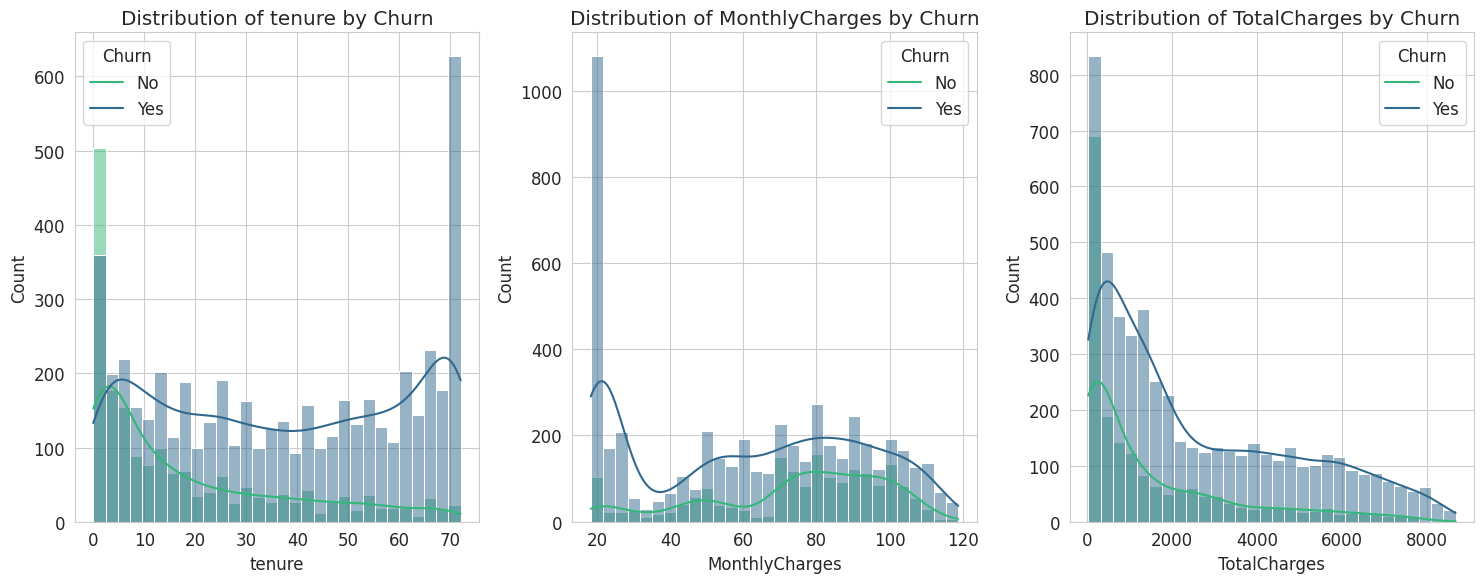

In [283]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='viridis')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

<ipython-input-284-f0c9aa2fa7c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
<ipython-input-284-f0c9aa2fa7c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
<ipython-input-284-f0c9aa2fa7c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


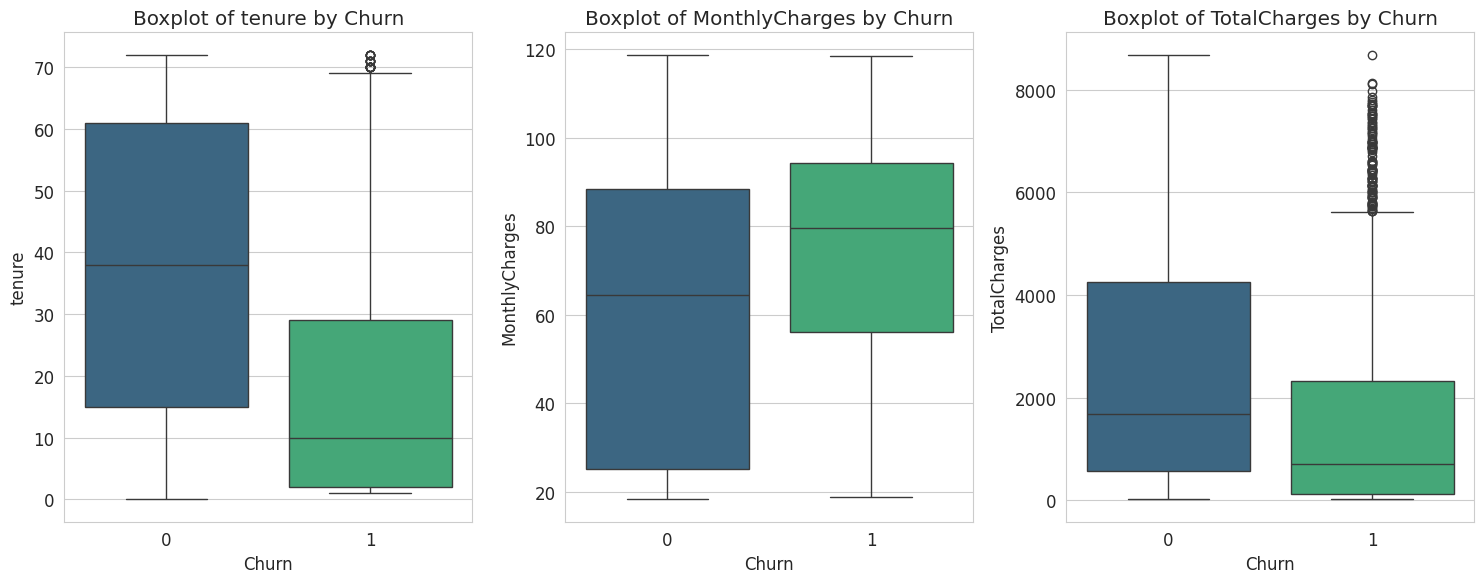

In [284]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
    plt.title(f'Boxplot of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

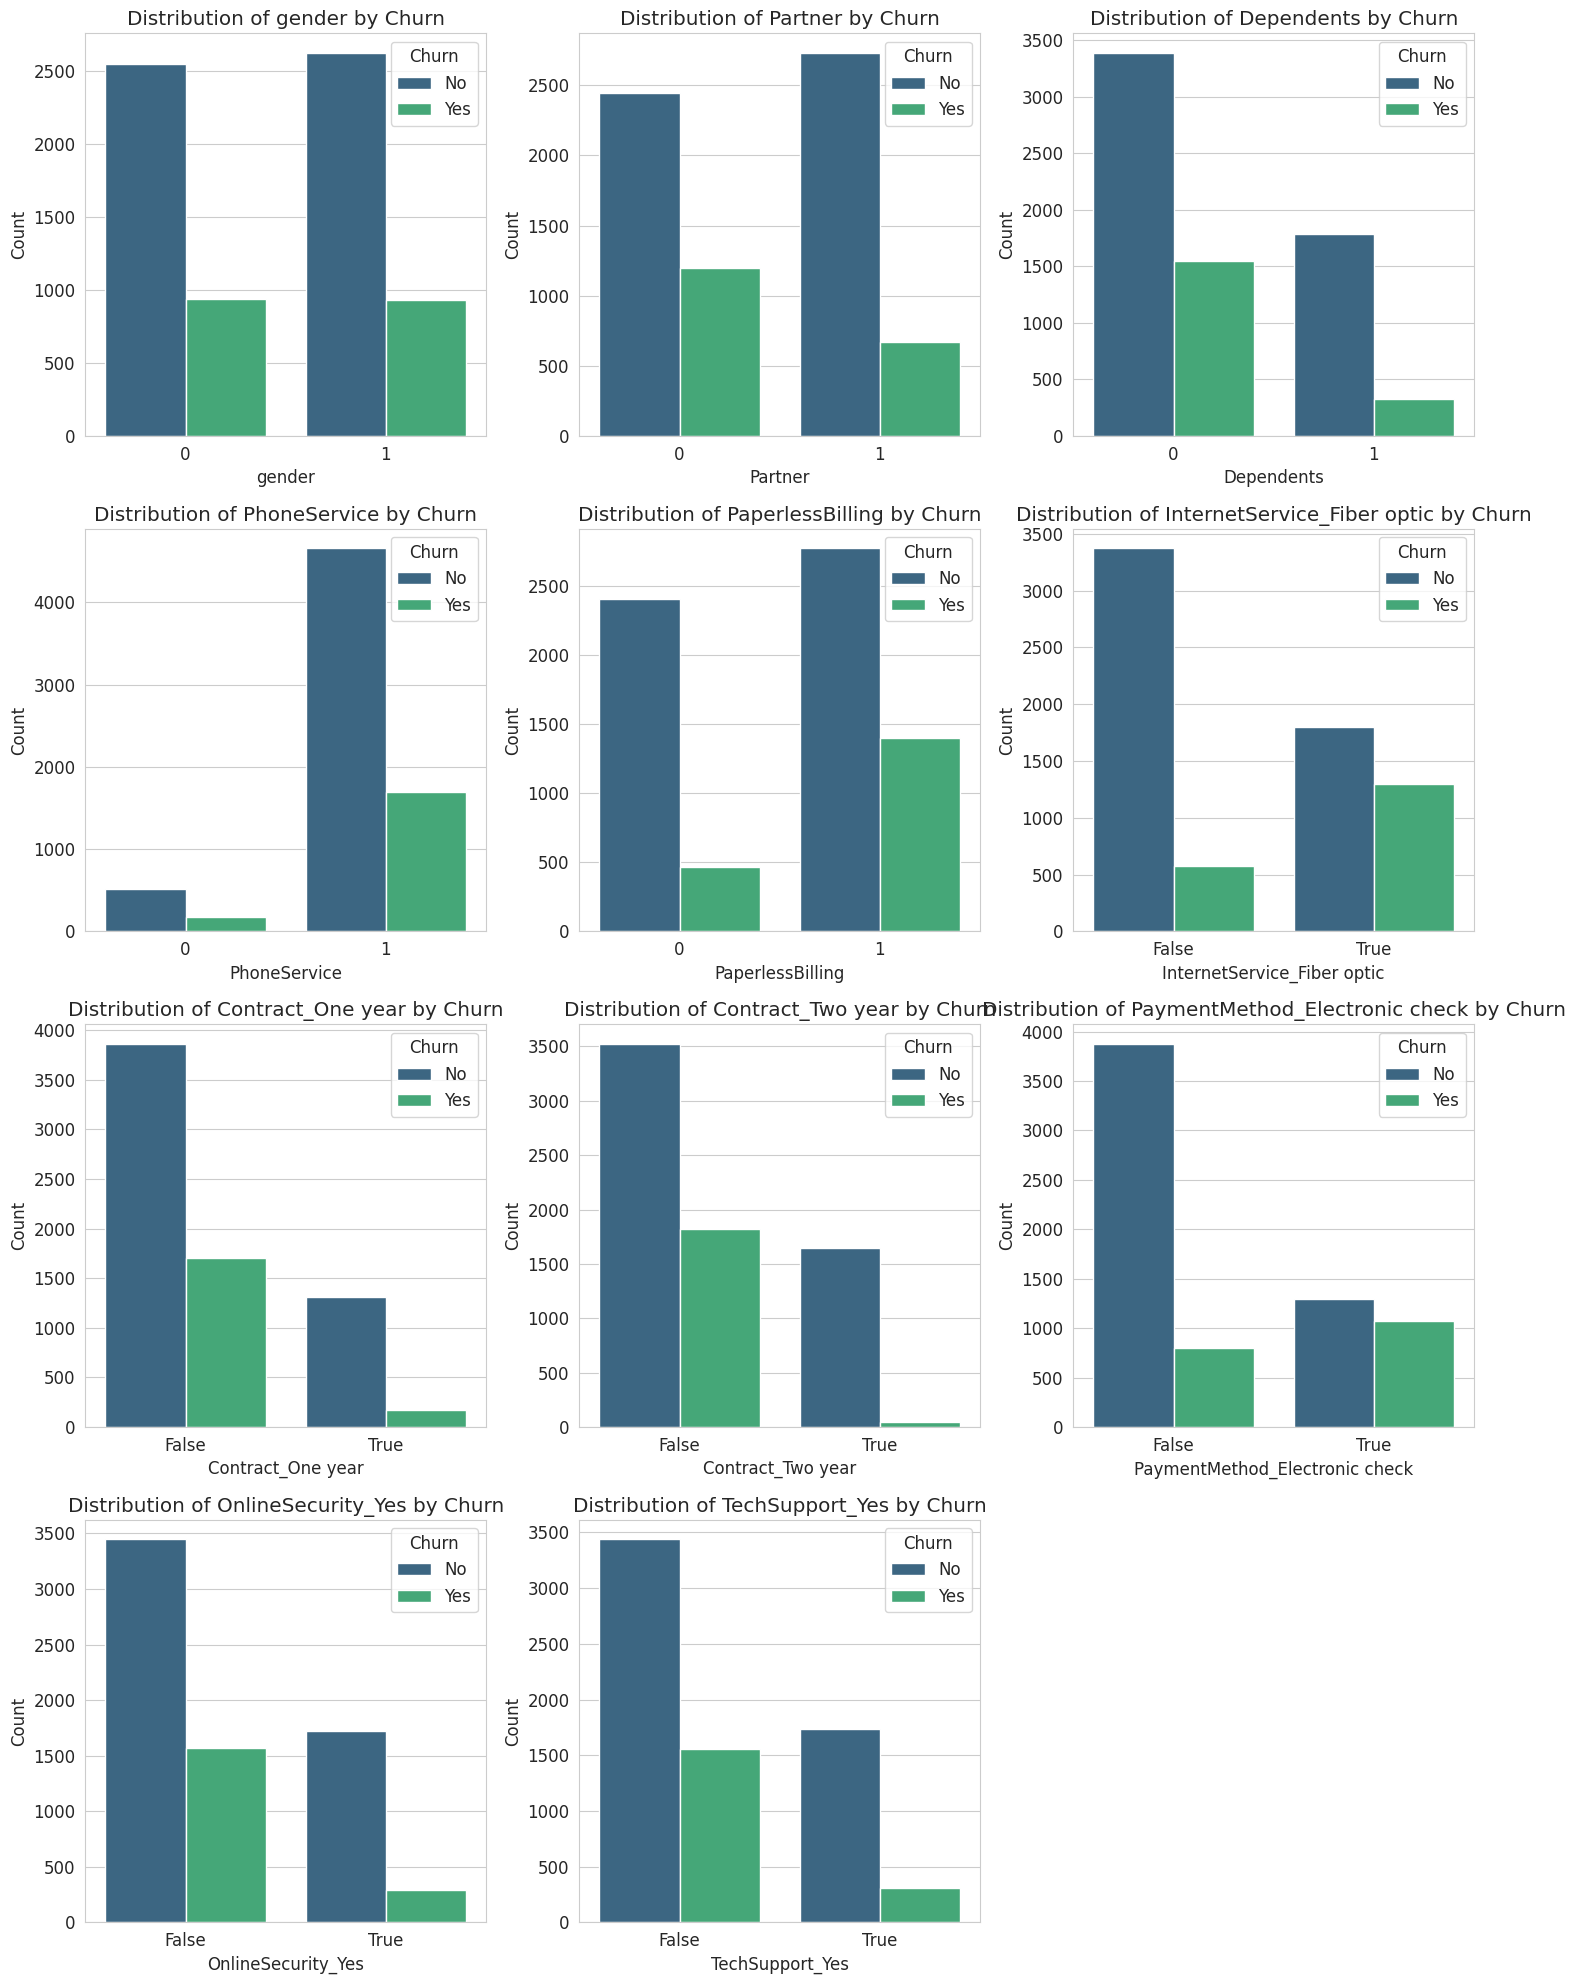

In [285]:
categorical_features_to_explore = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Electronic check', 'OnlineSecurity_Yes', 'TechSupport_Yes' # ตัวอย่างจากการ One-Hot
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_features_to_explore):
    plt.subplot(4, 3, i+1)
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [286]:
print("\nChurn Rate by Categorical Features (Top 5 for example):")
for col in ['Contract_One year', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'OnlineSecurity_Yes']:
    if col in df.columns:
        churn_rate = df.groupby(col)['Churn'].mean() * 100
        print(f"\n--- {col} ---")
        print(churn_rate)


Churn Rate by Categorical Features (Top 5 for example):

--- Contract_One year ---
Contract_One year
False    30.574506
True     11.269518
Name: Churn, dtype: float64

--- InternetService_Fiber optic ---
InternetService_Fiber optic
False    14.492019
True     41.892765
Name: Churn, dtype: float64

--- PaymentMethod_Electronic check ---
PaymentMethod_Electronic check
False    17.058572
True     45.285412
Name: Churn, dtype: float64

--- OnlineSecurity_Yes ---
OnlineSecurity_Yes
False    31.329618
True     14.611194
Name: Churn, dtype: float64


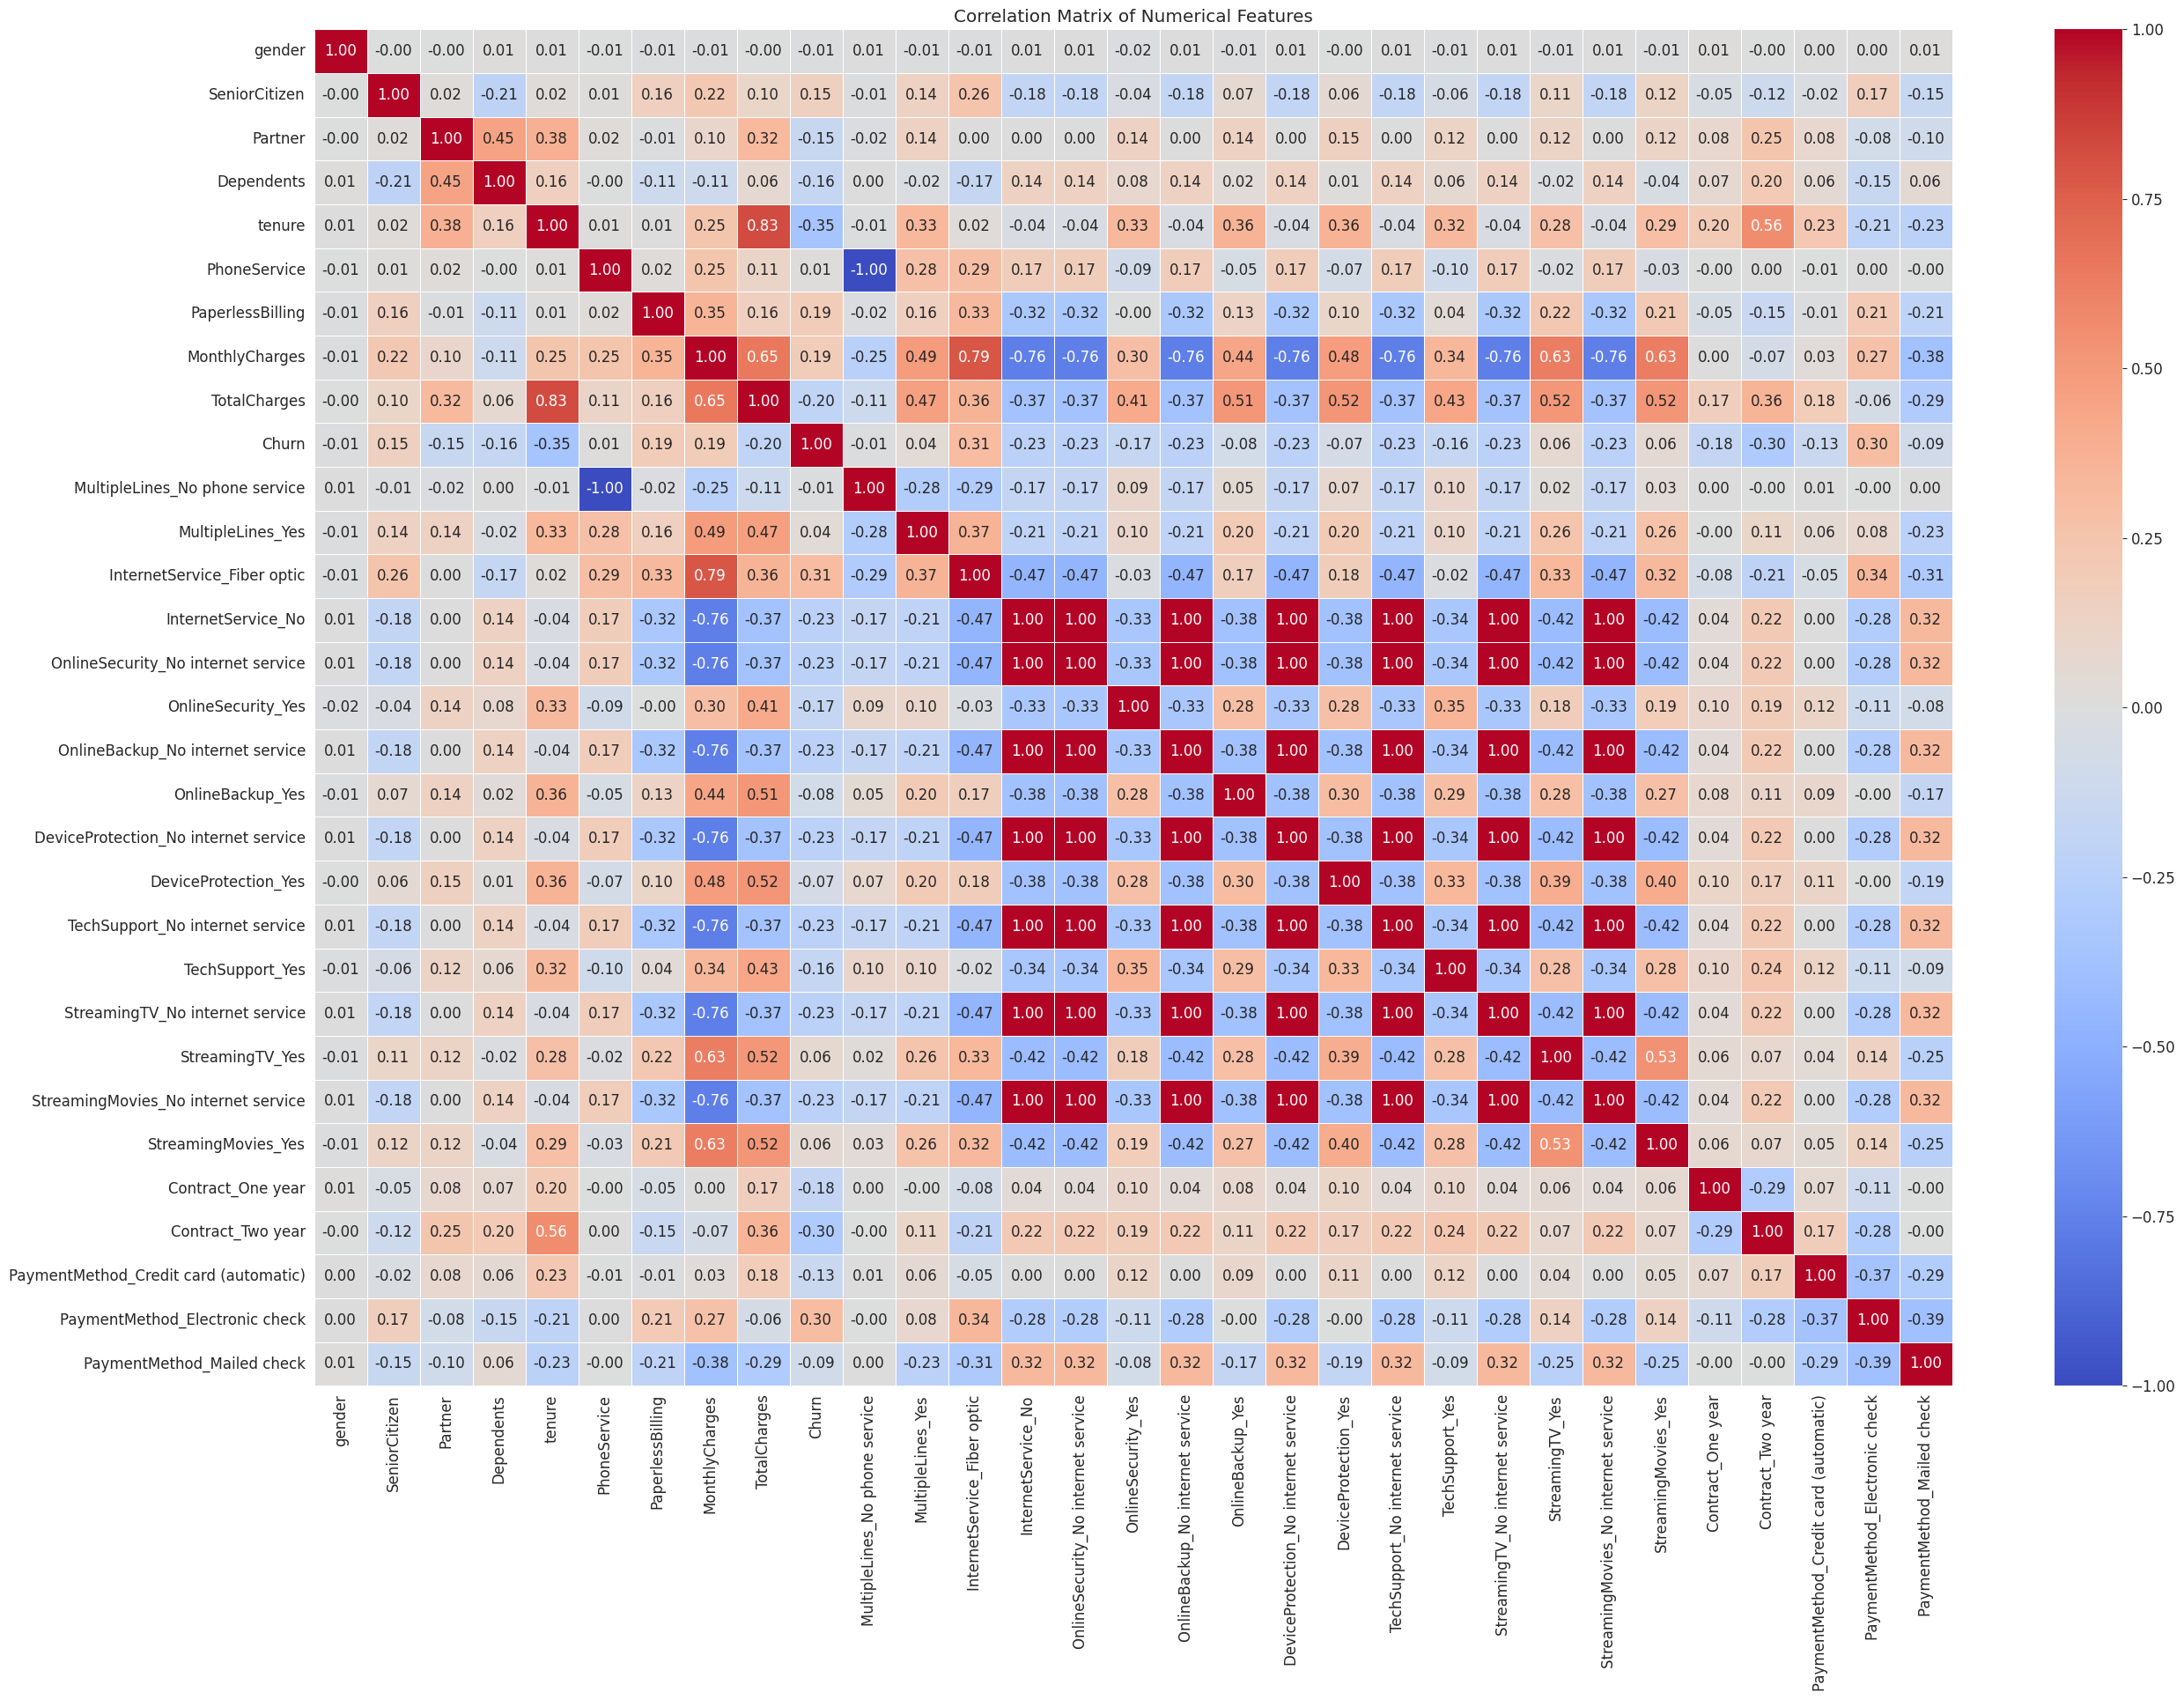

In [287]:
plt.figure(figsize=(30, 20))
# คำนวณ Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
# สร้าง Heatmap โดยแสดงค่า Correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [288]:
# คำนวณ Correlation Matrix
corr_matrix = df.corr(numeric_only=True)

# เลือกเฉพาะคอลัมน์ Churn จาก Correlation Matrix
churn_correlations = corr_matrix['Churn']

# ค่าความสัมพันธ์ Churn ในแต่ละคอลัมท์ (บวกไปลบ)
print("\nCorrelation of 'Churn' with other features (sorted from highest positive to highest negative):")
print(churn_correlations.sort_values(ascending=False))


Correlation of 'Churn' with other features (sorted from highest positive to highest negative):
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
Tech

tenure และ MonthlyCharges มี outlier ที่เยอะในกราฟ boxplot อาจจะต้องจับตาดู หากโมเดลมีประสิทธิภาพไม่ดี ค่อยมาจัดการ

## **Modeling**

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
import joblib

In [290]:
X =df.drop('Churn', axis =1)
y =df['Churn']
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (7043, 30)
Target (y) shape: (7043,)


In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (5634, 30), (5634,)
Test set shape: (1409, 30), (1409,)


In [292]:
# ตรวจสอบสัดส่วน Churn ใน Training และ Test set
print("\nChurn distribution in Training set:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in Test set:")
print(y_test.value_counts(normalize=True))


Churn distribution in Training set:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in Test set:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [293]:
#### การปรับขนาดข้อมูล (Feature Scaling)
# สร้าง Scaler
scaler = StandardScaler()
# Fit scaler บน Training data เท่านั้น และ Transform ทั้ง Training และ Test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [294]:
# แปลงกลับเป็น DataFrame เพื่อรักษาสภาพของคอลัมน์
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("\nFeatures have been scaled using StandardScaler.")


Features have been scaled using StandardScaler.


In [295]:
#### ฝึกฝนโมเดล (Train Models) และ K-Fold Cross-validation

# สร้าง dictionary สำหรับเก็บโมเดล
# XGBoost Classifier: `objective='binary:logistic'` สำหรับ Classification
# `eval_metric='logloss'` เป็น metric สำหรับประเมินระหว่างการฝึก
# `use_label_encoder=False` เพื่อหลีกเลี่ยง DeprecationWarning ใน XGBoost 1.x+
# `scale_pos_weight` ใช้จัดการ imbalance: count(negative examples) / count(positive examples)
# สำหรับข้อมูลของเรา Non-Churn:Churn = 5174:1869
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest Classifier': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost Classifier': xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                            use_label_encoder=False, random_state=42,
                                            scale_pos_weight=scale_pos_weight) # เพิ่ม scale_pos_weight
}

In [296]:
results = {}
cv_results = {}

# กำหนดโมเดลเริ่มต้น (พร้อม Class Weight/scale_pos_weight)
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost Classifier': xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                            use_label_encoder=False, random_state=42,
                                            scale_pos_weight=scale_pos_weight)
}

print("\n--- Training Models and Performing K-Fold Cross-validation (Initial Models) ---")

# กำหนด K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nProcessing {name}...")

    # กำหนดข้อมูลที่จะใช้ (Scaled สำหรับ LR, ไม่ Scaled สำหรับ Tree-based และ XGBoost)
    if name == 'Logistic Regression':
        X_train_data = X_train_scaled
        X_test_data = X_test_scaled
    else: # Decision Tree, Random Forest, XGBoost
        X_train_data = X_train
        X_test_data = X_test

    # 1. ฝึกโมเดลบน Training Set เต็ม
    model.fit(X_train_data, y_train)
    y_pred = model.predict(X_test_data)
    y_proba = model.predict_proba(X_test_data)[:, 1]

    # ประเมินประสิทธิภาพบน Test Set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }

    # 2. ทำ K-Fold Cross-validation บน Training Set
    scoring = ['f1', 'roc_auc', 'precision', 'recall', 'accuracy']
    cv_scores = cross_validate(model, X_train_data, y_train, cv=kf, scoring=scoring, n_jobs=-1)

    cv_results[name] = {
        'Mean F1-Score (CV)': np.mean(cv_scores['test_f1']),
        'Mean ROC-AUC (CV)': np.mean(cv_scores['test_roc_auc']),
        'Mean Precision (CV)': np.mean(cv_scores['test_precision']),
        'Mean Recall (CV)': np.mean(cv_scores['test_recall']),
        'Mean Accuracy (CV)': np.mean(cv_scores['test_accuracy']),
        'CV Scores': cv_scores
    }

    print(f"--- {name} Test Set Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"--- {name} Cross-Validation Results ---")
    print(f"Mean F1-Score (CV): {cv_results[name]['Mean F1-Score (CV)']:.4f}")
    print(f"Mean ROC-AUC (CV): {cv_results[name]['Mean ROC-AUC (CV)']:.4f}")
    print(f"Mean Precision (CV): {cv_results[name]['Mean Precision (CV)']:.4f}")
    print(f"Mean Recall (CV): {cv_results[name]['Mean Recall (CV)']:.4f}")
    print(f"Mean Accuracy (CV): {cv_results[name]['Mean Accuracy (CV)']:.4f}")
    print("-" * 50)

print("\nAll initial models trained and evaluated with K-Fold Cross-validation.")


--- Training Models and Performing K-Fold Cross-validation (Initial Models) ---

Processing Logistic Regression...
--- Logistic Regression Test Set Results ---
Accuracy: 0.7395
Precision: 0.5060
Recall: 0.7834
F1-Score: 0.6149
ROC-AUC: 0.8412
--- Logistic Regression Cross-Validation Results ---
Mean F1-Score (CV): 0.6312
Mean ROC-AUC (CV): 0.8457
Mean Precision (CV): 0.5193
Mean Recall (CV): 0.8059
Mean Accuracy (CV): 0.7506
--------------------------------------------------

Processing Decision Tree Classifier...
--- Decision Tree Classifier Test Set Results ---
Accuracy: 0.7410
Precision: 0.5125
Recall: 0.4920
F1-Score: 0.5020
ROC-AUC: 0.6610
--- Decision Tree Classifier Cross-Validation Results ---
Mean F1-Score (CV): 0.4907
Mean ROC-AUC (CV): 0.6540
Mean Precision (CV): 0.4805
Mean Recall (CV): 0.5034
Mean Accuracy (CV): 0.7233
--------------------------------------------------

Processing Random Forest Classifier...
--- Random Forest Classifier Test Set Results ---
Accuracy: 0.78

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost Classifier Test Set Results ---
Accuracy: 0.7644
Precision: 0.5457
Recall: 0.6711
F1-Score: 0.6019
ROC-AUC: 0.8164
--- XGBoost Classifier Cross-Validation Results ---
Mean F1-Score (CV): 0.5810
Mean ROC-AUC (CV): 0.8199
Mean Precision (CV): 0.5344
Mean Recall (CV): 0.6377
Mean Accuracy (CV): 0.7567
--------------------------------------------------

All initial models trained and evaluated with K-Fold Cross-validation.


In [297]:
# กำหนด K-Fold สำหรับ GridSearchCV
kf_grid = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score) # กำหนด scorer สำหรับ F1-score

# Hyperparameter Tuning for Logistic Regression ---
print("\n--- Hyperparameter Tuning for Logistic Regression with GridSearchCV ---")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'], # ใช้ liblinear เหมาะกับ L1/L2 และ class_weight
    'class_weight': ['balanced']
}
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=kf_grid,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=1
)
grid_search_lr.fit(X_train_scaled, y_train) # ใช้ X_train_scaled

best_log_reg_model = grid_search_lr.best_estimator_
print(f"Best Hyperparameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best F1-Score (from GridSearchCV on LR): {grid_search_lr.best_score_:.4f}")

# Hyperparameter Tuning for XGBoost ---
print("\n--- Hyperparameter Tuning for XGBoost with GridSearchCV ---")
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.9],
    'subsample': [0.7, 0.9],
    'scale_pos_weight': [scale_pos_weight]
}
grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42),
    param_grid=param_grid_xgb,
    cv=kf_grid,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_train, y_train) # ใช้ X_train (unscaled) สำหรับ XGBoost

best_xgb_model = grid_search_xgb.best_estimator_
print(f"\nBest Hyperparameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best F1-Score (from GridSearchCV on XGBoost): {grid_search_xgb.best_score_:.4f}")


--- Hyperparameter Tuning for Logistic Regression with GridSearchCV ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters for Logistic Regression: {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best F1-Score (from GridSearchCV on LR): 0.6312

--- Hyperparameter Tuning for XGBoost with GridSearchCV ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:28:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Hyperparameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': np.float64(2.768561872909699), 'subsample': 0.7}
Best F1-Score (from GridSearchCV on XGBoost): 0.6345


## **Model Evaluation**

In [298]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay # สำหรับวาดกราฟ
from sklearn.linear_model import LogisticRegression # อาจต้อง import อีกครั้งหากไม่ได้รวมไว้
from sklearn.model_selection import GridSearchCV # สำหรับ Hyperparameter Tuning
from sklearn.tree import DecisionTreeClassifier # สำหรับตัวอย่าง Feature Importance (หากต้องการ)
from sklearn.ensemble import RandomForestClassifier # สำหรับตัวอย่าง Feature Importance (หากต้องการ)


--- Starting Model Evaluation of Trained Models ---

Confusion Matrix for Optimized XGBoost:
[[778 257]
 [ 78 296]]


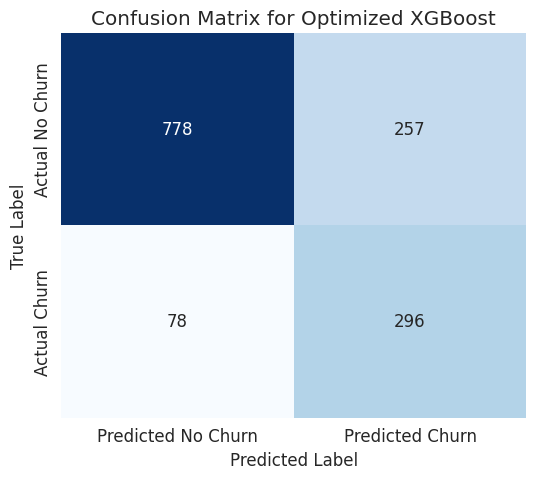


Confusion Matrix for Optimized Logistic Regression:
[[749 286]
 [ 81 293]]


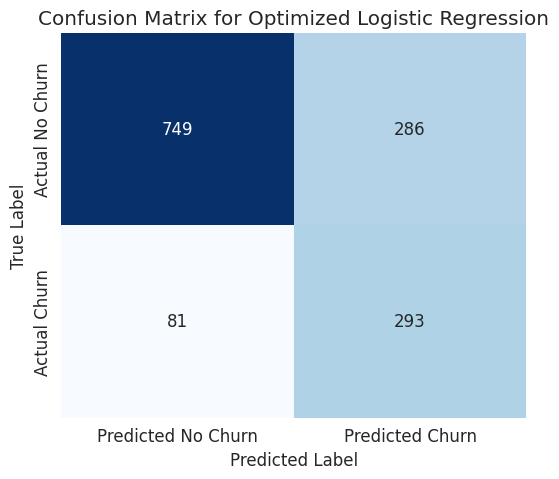

In [299]:
print("\n--- Starting Model Evaluation of Trained Models ---")

#### Confusion Matrix (สำหรับโมเดลที่ดีที่สุด เช่น Optimized XGBoost หรือ Optimized Logistic Regression)

# เลือกโมเดลที่คุณต้องการนำเสนอ Confusion Matrix (เช่น Optimized XGBoost)
y_pred_to_plot = y_pred_xgb_best
model_name_to_plot = "Optimized XGBoost"
cm_to_plot = confusion_matrix(y_test, y_pred_to_plot)

print(f"\nConfusion Matrix for {model_name_to_plot}:")
print(cm_to_plot)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_to_plot, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title(f'Confusion Matrix for {model_name_to_plot}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# หรือถ้าคุณต้องการแสดง Logistic Regression ที่ดีที่สุดจากการจูน
y_pred_to_plot = best_log_reg_model.predict(X_test_scaled)
model_name_to_plot = "Optimized Logistic Regression"
cm_to_plot = confusion_matrix(y_test, y_pred_to_plot)


print(f"\nConfusion Matrix for {model_name_to_plot}:")
print(cm_to_plot)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_to_plot, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title(f'Confusion Matrix for {model_name_to_plot}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [300]:
#### Classification Report (สำหรับโมเดลที่ดีที่สุด)

print(f"\nClassification Report for {model_name_to_plot}:")
print(classification_report(y_test, y_pred_to_plot))


Classification Report for Optimized Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409




ROC-AUC Score for Optimized Logistic Regression: 0.8412


<Figure size 800x600 with 0 Axes>

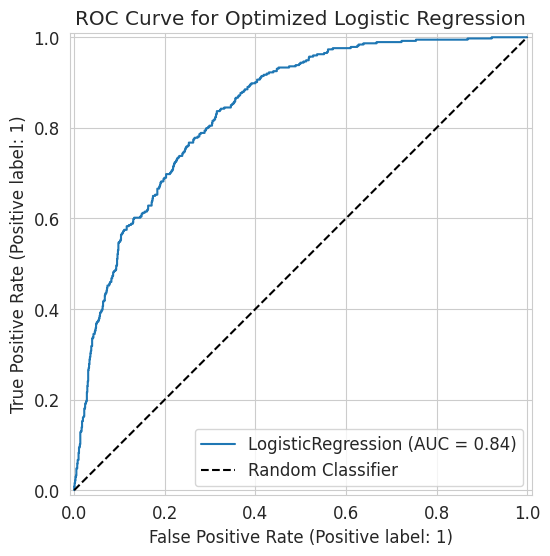

In [301]:
#### ROC Curve และ AUC Score (สำหรับโมเดลที่ดีที่สุด)

# เลือก y_proba ที่เกี่ยวข้องกับโมเดลที่เลือก
# y_proba_to_plot = y_proba_xgb_best
# model_to_plot_roc = best_xgb_model # ต้องใช้ estimator (โมเดล) ที่เหมาะสมกับ X_test (unscaled)
# X_test_for_plot = X_test # สำหรับ XGBoost

# หรือถ้าคุณต้องการแสดง Logistic Regression ที่ดีที่สุดจากการจูน
y_proba_to_plot = best_log_reg_model.predict_proba(X_test_scaled)[:, 1]
model_to_plot_roc = best_log_reg_model # ต้องใช้ estimator (โมเดล) ที่เหมาะสมกับ X_test_scaled
X_test_for_plot = X_test_scaled # สำหรับ Logistic Regression


print(f"\nROC-AUC Score for {model_name_to_plot}: {roc_auc_score(y_test, y_proba_to_plot):.4f}")

plt.figure(figsize=(8, 6))
# RocCurveDisplay.from_estimator ใช้โมเดลและข้อมูลที่เหมาะสม (scaled/unscaled)
RocCurveDisplay.from_estimator(model_to_plot_roc, X_test_for_plot, y_test)
plt.title(f'ROC Curve for {model_name_to_plot}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

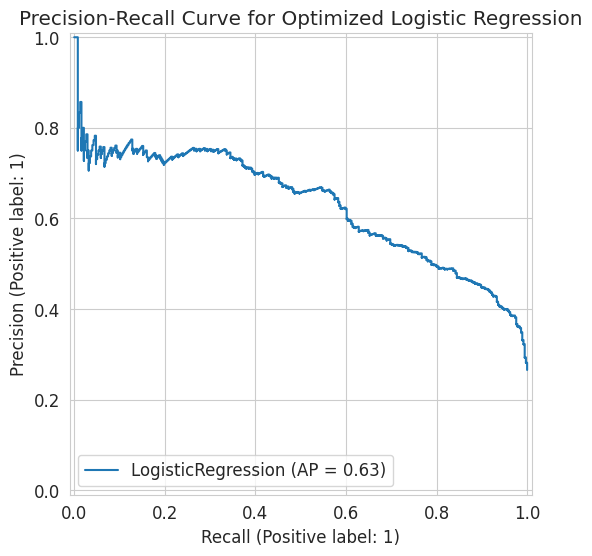

In [302]:
#### **6.1.4 Precision-Recall Curve (สำหรับโมเดลที่ดีที่สุด)**

plt.figure(figsize=(8, 6))
# PrecisionRecallDisplay.from_estimator ใช้โมเดลและข้อมูลที่เหมาะสม (scaled/unscaled)
PrecisionRecallDisplay.from_estimator(model_to_plot_roc, X_test_for_plot, y_test)
plt.title(f'Precision-Recall Curve for {model_name_to_plot}')
plt.show()


--- Feature Importance ---

Top 10 Feature Importance (Optimized Logistic Regression - Absolute Coefficients):
tenure                            1.138336
MonthlyCharges                    1.036150
InternetService_Fiber optic       0.810878
Contract_Two year                 0.618446
TotalCharges                      0.471756
Contract_One year                 0.297012
StreamingMovies_Yes               0.286826
StreamingTV_Yes                   0.273658
MultipleLines_Yes                 0.201701
PaymentMethod_Electronic check    0.189324
dtype: float64


<ipython-input-303-a8e7b43d3650>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abs_coefs.head(10).values, y=abs_coefs.head(10).index, palette='viridis')


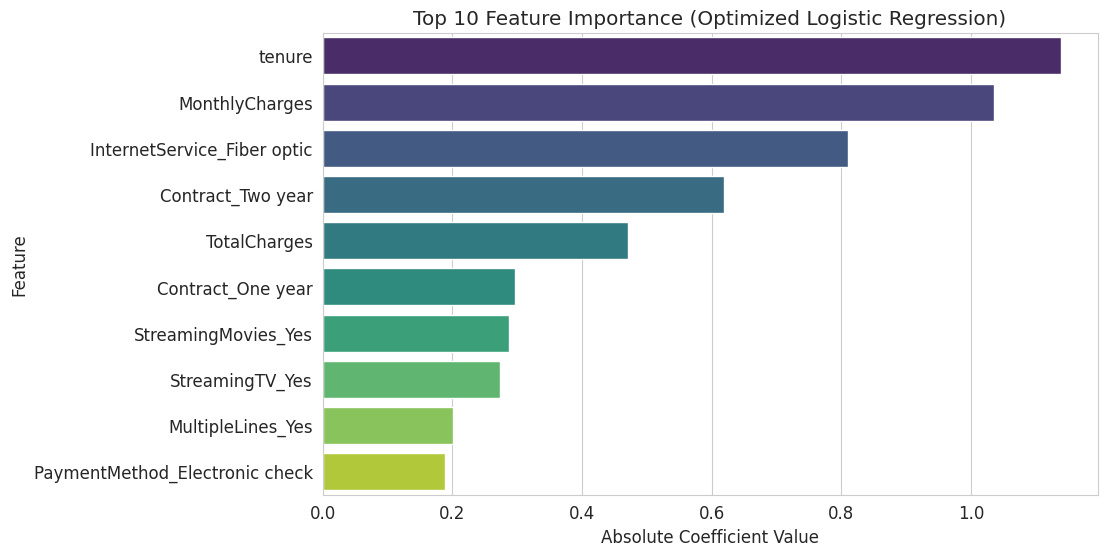


Top 10 Feature Importance (Optimized XGBoost):
Contract_Two year                     0.451060
Contract_One year                     0.215324
InternetService_Fiber optic           0.109739
InternetService_No                    0.029495
OnlineSecurity_No internet service    0.027899
StreamingMovies_Yes                   0.022536
tenure                                0.016605
MultipleLines_No phone service        0.011541
PaymentMethod_Electronic check        0.011246
StreamingTV_Yes                       0.008836
dtype: float32


<ipython-input-303-a8e7b43d3650>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_xgb_sorted.head(10).values, y=feature_importances_xgb_sorted.head(10).index, palette='magma')


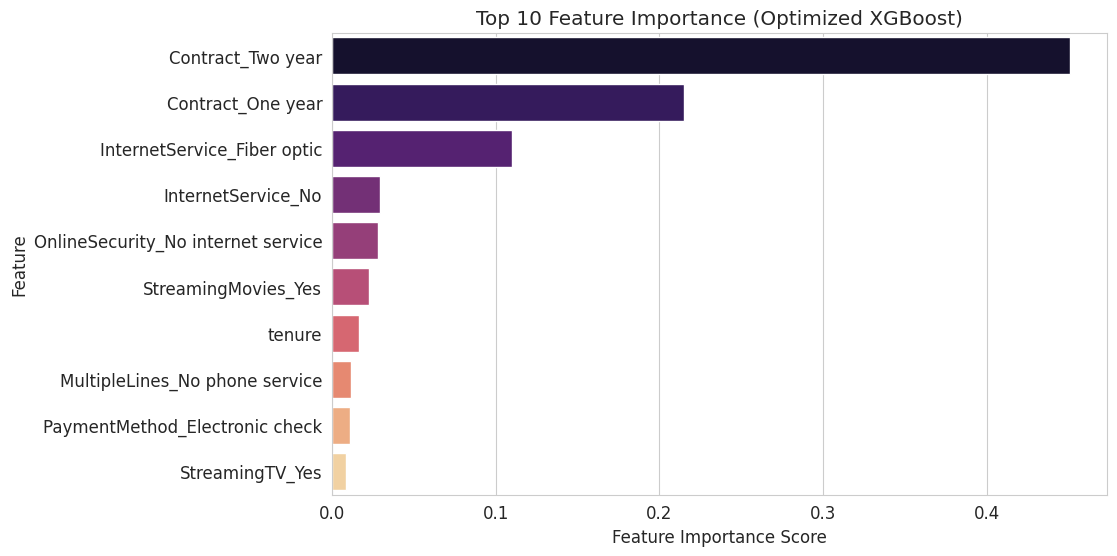

In [303]:
print("\n--- Feature Importance ---")

# สำหรับ Logistic Regression ที่ Optimized:
# ใช้ best_log_reg_model ที่ได้จากการจูน Hyperparameters
print("\nTop 10 Feature Importance (Optimized Logistic Regression - Absolute Coefficients):")
coefs = pd.Series(best_log_reg_model.coef_[0], index=X.columns)
abs_coefs = coefs.abs().sort_values(ascending=False)
print(abs_coefs.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=abs_coefs.head(10).values, y=abs_coefs.head(10).index, palette='viridis')
plt.title('Top 10 Feature Importance (Optimized Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# สำหรับ XGBoost ที่ Optimized (หากคุณต้องการดู):
# ต้องแน่ใจว่า best_xgb_model มีอยู่ใน Session
# และใช้ X (unscaled) ในการหา Feature Importance
print("\nTop 10 Feature Importance (Optimized XGBoost):")
feature_importances_xgb = pd.Series(best_xgb_model.feature_importances_, index=X.columns)
feature_importances_xgb_sorted = feature_importances_xgb.sort_values(ascending=False)
print(feature_importances_xgb_sorted.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_xgb_sorted.head(10).values, y=feature_importances_xgb_sorted.head(10).index, palette='magma')
plt.title('Top 10 Feature Importance (Optimized XGBoost)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

## **Deployment**

In [304]:
# เลือกโมเดลที่จะบันทึก (เนื่องจากเรามี best_log_reg_model แล้ว)
model_to_deploy = best_log_reg_model
model_name_for_save = "optimized_logistic_regression_model.pkl"
is_model_lr = True # Flag เพื่อบอกว่าโมเดลที่เลือกคือ LR (ใช้ใน Streamlit)

print(f"\n--- Saving selected model: {model_name_for_save} ---")


--- Saving selected model: optimized_logistic_regression_model.pkl ---


In [305]:
# บันทึก Scaler
# ตรวจสอบว่า 'scaler' มีอยู่และถูก fit แล้ว
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [306]:
# บันทึกโมเดลที่ดีที่สุด ---
joblib.dump(model_to_deploy, model_name_for_save)
print(f"Model saved as {model_name_for_save}")

Model saved as optimized_logistic_regression_model.pkl


In [307]:
# บันทึกค่า Median ของ TotalCharges จาก Training Data
# ตรวจสอบว่า 'median_total_charges_overall' มีอยู่
median_total_charges_overall = df['TotalCharges'].median()
joblib.dump(median_total_charges_overall, "median_total_charges_train.pkl")
print("Median TotalCharges from training data saved as median_total_charges_train.pkl")

Median TotalCharges from training data saved as median_total_charges_train.pkl


In [308]:
# บันทึกชื่อคอลัมน์ (Feature Columns) ของ X หลังจาก One-Hot Encoding ทั้งหมด
# ตรวจสอบว่า 'feature_columns' มีอยู่ (มาจาก X.columns.tolist() หลัง Preprocessing)
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")
print("Feature columns saved as feature_columns.pkl")

Feature columns saved as feature_columns.pkl


In [309]:
print("\n--- All necessary assets saved successfully for Deployment! ---")
print("\n**Next Steps:**")
print("1. Download these 4 files from Google Colab to your local machine (e.g., into your VS Code project folder):")
print(f"   - {model_name_for_save}")
print(f"   - scaler.pkl")
print(f"   - median_total_charges_train.pkl")
print(f"   - feature_columns.pkl")
print("2. Proceed to Part 2: Deployment with Streamlit in VS Code.")


--- All necessary assets saved successfully for Deployment! ---

**Next Steps:**
1. Download these 4 files from Google Colab to your local machine (e.g., into your VS Code project folder):
   - optimized_logistic_regression_model.pkl
   - scaler.pkl
   - median_total_charges_train.pkl
   - feature_columns.pkl
2. Proceed to Part 2: Deployment with Streamlit in VS Code.
